In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [4]:
#1. 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing flipper_length_mm or species data
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Get a list of unique species
species_list = penguins['species'].unique()

# Function to add lines and rectangles for statistics on the plot
def add_stats(fig, data, color):
    # Compute statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    data_min = data.min()
    data_max = data.max()
    
    # Add lines for mean and median
    fig.add_vline(x=mean, line=dict(color=color, dash="dash"), annotation_text="Mean", annotation_position="top right", annotation=dict(font_size=12))
    fig.add_vline(x=median, line=dict(color=color, dash="dot"), annotation_text="Median", annotation_position="top left", annotation=dict(font_size=12))
    
    # Add rectangle for IQR
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor=color, opacity=0.3, annotation_text="IQR", annotation_position="inside right", annotation=dict(font_size=10))
    
    # Add rectangle for range
    fig.add_vrect(x0=data_min, x1=data_max, line_width=0, fillcolor=color, opacity=0.1, annotation_text="Range", annotation_position="inside left", annotation=dict(font_size=10))
    
    # Add rectangle for ±2 standard deviations
    fig.add_vrect(x0=mean-2*std_dev, x1=mean+2*std_dev, line_width=0, fillcolor=color, opacity=0.2, annotation_text="±2 SD", annotation_position="inside right", annotation=dict(font_size=10))

# Create histograms for each species
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Create the histogram plot for the species
    fig = px.histogram(penguins[penguins['species'] == species], x="flipper_length_mm", title=f"{species} Flipper Length Histogram")
    
    # Add statistics (mean, median, range, IQR, ±2 SD)
    add_stats(fig, species_data, color="blue")
    
    # Adjust layout to ensure annotations and titles do not overlap
    fig.update_layout(
        title_x=0.5,  # Center the title
        margin=dict(t=60, l=40, r=40, b=40),  # Adjust margins to make space for annotations
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    )
    
    # Show the figure
    fig.show()


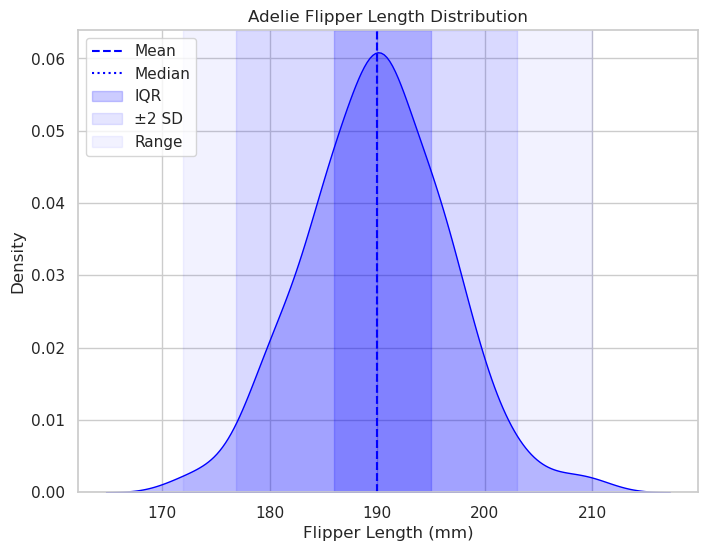

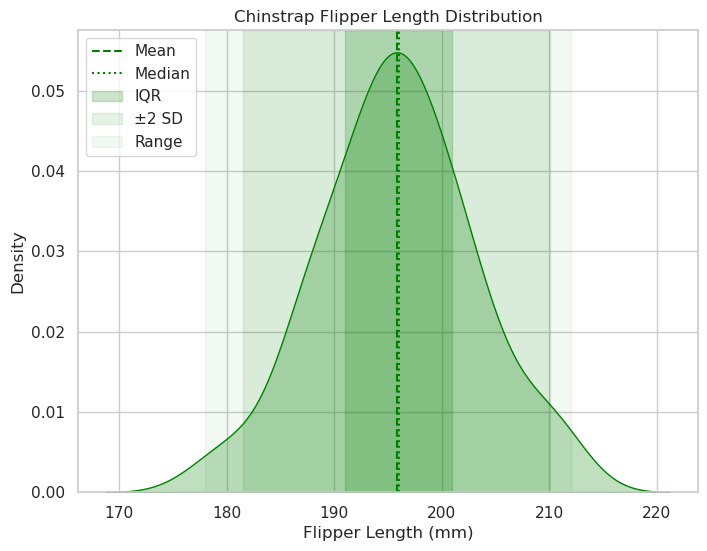

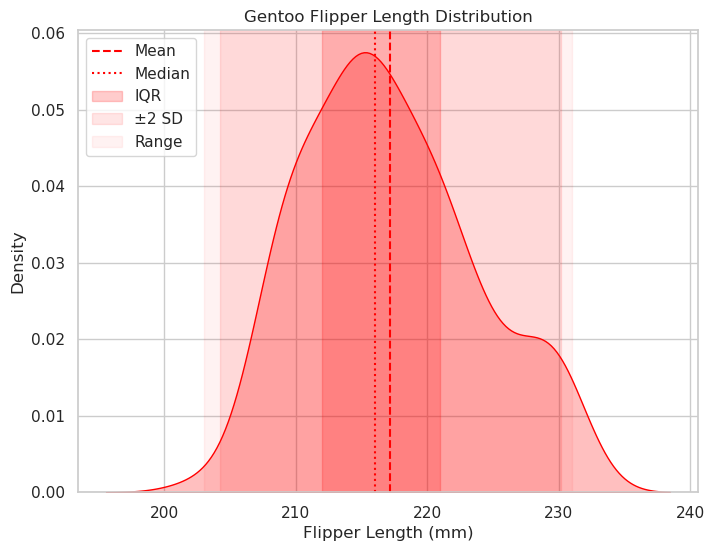

In [6]:
#2. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing flipper_length_mm or species data
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set the overall style for Seaborn
sns.set(style="whitegrid")

# Define colors for each species (optional, but helps with distinct visualizations)
species_colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Function to add lines and rectangles for statistics on the KDE plot
def add_stats(ax, data, color):
    # Compute statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    data_min = data.min()
    data_max = data.max()
    
    # Add lines for mean and median
    ax.axvline(mean, color=color, linestyle="--", label="Mean")
    ax.axvline(median, color=color, linestyle=":", label="Median")
    
    # Add rectangle for IQR
    ax.axvspan(q1, q3, color=color, alpha=0.2, label="IQR")
    
    # Add rectangle for ±2 standard deviations
    ax.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color=color, alpha=0.1, label="±2 SD")
    
    # Add rectangle for range (min to max)
    ax.axvspan(data_min, data_max, color=color, alpha=0.05, label="Range")

# Create a KDE plot for each species
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Create the KDE plot
    plt.figure(figsize=(8, 6))
    ax = sns.kdeplot(species_data, color=species_colors[species], fill=True)
    
    # Add the statistical markers (mean, median, IQR, ±2 SD)
    add_stats(ax, species_data, color=species_colors[species])
    
    # Set plot titles and labels
    plt.title(f"{species} Flipper Length Distribution")
    plt.xlabel("Flipper Length (mm)")
    plt.ylabel("Density")
    
    # Add the legend and show the plot
    plt.legend(loc='upper left')
    plt.show()


#3. I think I have a preference for the KDE as it provides a better visualization in my opinion. I like that it displays data better for continuous data while also smoothining out the values for discrete data. It also shows the peaks of the data well and is more pleasant on the eyes in my opinion. 

In [7]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#4. 
1. Which datasets have similar means and similar variances
I would say A and C have quite similar means and also share very similar variances, as adding up all their values and dividing it gives a close average of 5 from just looking, while keeping their variance somewhat high as they have data spread all over the place or in two completely seperate peaks
2. Which datasets have similar means but quite different variances
Dataset A and B would have similar means since they all seem to have a mean of around 5, since adding up all the data equals an average of around 5, but the variance is quite drastically different as one is way more concentrated near the middle or the mean, while the other is heavily spread out across the range from 0-10, yet when added up the mean still turns out to be 5
3. Which datasets have similar variances but quite different means
I would say that B and D may share similar variances since their general shape is similar, following the single peak, its just D is a lot more concetrated. Their means is somewhat different too as D has the peak shifted towards 6 more than 5, so I would say B and D fulfill this condition.
4. Which datasets have quite different means and quite different variances
A and D would have the most differences as their variance and means are all different. Their general shape and their average are both quite different.

Link to Conversation: https://chatgpt.com/share/66f322bf-dfbc-8010-9bc4-2023fef35cdd
Here’s a summary of our conversation:

Plotting Histograms:

You initially asked about marking statistical features (mean, median, range, interquartile range, and ±2 standard deviations) onto histograms of penguin flipper lengths using Plotly. I provided a Plotly-based solution for that, and you later asked for the legends not to overlap, which I resolved.
Comparison of KDEs and Histograms:

You asked if Seaborn’s Kernel Density Estimations (KDEs) could be used to produce the same result, and I provided code using Seaborn to mark statistical features on KDEs.
You also made a thoughtful comparison between histograms, KDEs, and box plots. I agreed with your observations about the different ways these visualizers handle data and refined your point about box plots not directly showing standard deviation but using interquartile range (IQR).
Pros and Cons of Data Visualizers:

I gave a detailed pros and cons list comparing histograms, KDEs, and box plots, highlighting their strengths and weaknesses in different contexts, such as simplicity, handling of frequency, distribution shapes, parameter sensitivity, and outlier detection.
Exploring Data Distributions:

You provided code that generated histograms of four datasets (uniform, normal, bimodal, and normal distributions). I reviewed it and suggested it was well-constructed, with advice on making it more flexible for future use.
Analyzing Means and Variances:

You asked which datasets had similar or different means and variances. After computing the statistics for the four datasets, I provided insights into which datasets had similar means, similar variances, or significantly different values. I concluded that:
Datasets A and C had similar means and variances.
Datasets A, B, and C had similar means but different variances.
Datasets A and D, and B and D, had both different means and variances.
Overall, we explored multiple data visualization techniques and statistical comparisons to help analyze various datasets.


#5. 
In skewed data, the median is often a better representation of the overall average of the data, or rather the 50% percentile. While the mean shows the numerical calculation of the average, it is much more susceptible to extremes or outliers, causing it to be somwhat innacurate if an extreme outlier skews the dataset. The graphs below show the differences of each value in a clear way.

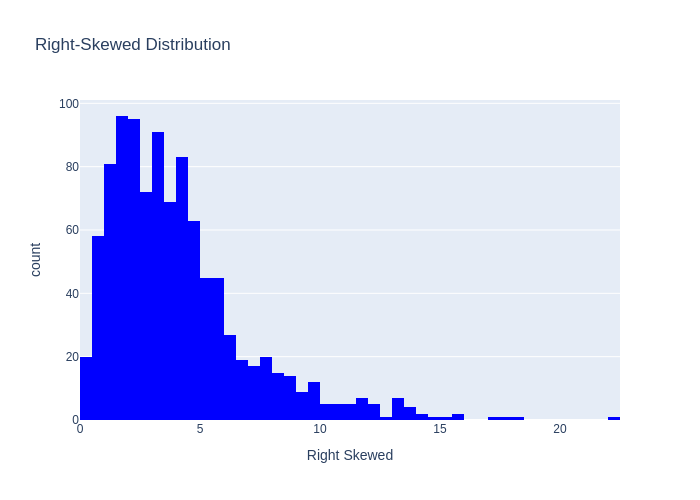

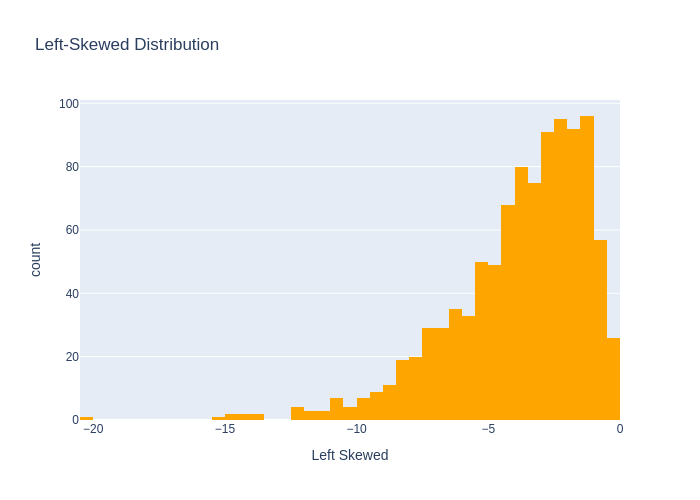

Right Skewed Sample - Mean: 4.08563316936433, Median: 3.4185734603432767
Left Skewed Sample - Mean: -3.8488306799519294, Median: -3.302737258922545


In [9]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Function to compute mean and median
def compute_stats(sample):
    mean = sample.mean()
    median = np.quantile(sample, 0.5)
    return mean, median

# Generate a random sample from a right-skewed Gamma distribution
right_skewed_sample = stats.gamma(a=2, scale=2).rvs(size=1000)

# Generate a random sample from a left-skewed distribution (negated gamma)
left_skewed_sample = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Compute mean and median for right skewed data
mean_right, median_right = compute_stats(right_skewed_sample)

# Compute mean and median for left skewed data
mean_left, median_left = compute_stats(left_skewed_sample)

# Plot histograms for both samples
fig_right = px.histogram(pd.DataFrame({'Right Skewed': right_skewed_sample}), 
                          x="Right Skewed", 
                          title="Right-Skewed Distribution",
                          color_discrete_sequence=['blue'])
fig_left = px.histogram(pd.DataFrame({'Left Skewed': left_skewed_sample}), 
                         x="Left Skewed", 
                         title="Left-Skewed Distribution",
                         color_discrete_sequence=['orange'])

# Show the plots
fig_right.show(renderer="png")  # Use this for GitHub and MarkUs submissions
fig_left.show(renderer="png")    # Use this for GitHub and MarkUs submissions

# Output the results
print(f"Right Skewed Sample - Mean: {mean_right}, Median: {median_right}")
print(f"Left Skewed Sample - Mean: {mean_left}, Median: {median_left}")


Link to Conversation:https://chatgpt.com/share/66f327cf-8390-8010-be58-142f1477ce30
Certainly! Here’s a summary of our interaction:

Initial Code Review:

You provided a code snippet for generating samples from a gamma distribution, computing the mean and median, and plotting a histogram for the sample.
Explanation of Mean and Median:

I explained the differences between mean and median, particularly in the context of skewed data. I highlighted that the mean is sensitive to outliers and can be misleading in skewed distributions, while the median is more robust and better represents the center of the data.
Extended Code:

I provided an extended version of your code that included:
Generation of both left-skewed and right-skewed samples.
Computation of the mean and median for both samples.
Combined histogram visualization for both distributions to illustrate their shapes and central tendencies.
Separation of Histograms:

Upon your request, I further modified the code to display separate histograms for the left-skewed and right-skewed distributions, enhancing clarity and allowing for better visual comparison.
Overall Learning:

The interaction focused on understanding skewness in data, the impact of outliers on mean and median, and effectively visualizing distributions using histograms.
If you need any more details or further assistance, feel free to ask!

In [17]:
#6.
import pandas as pd

# Load the CSV file from the URL
olympics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv')

# Display the first few rows of the dataframe
print(olympics.head())


   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [15]:
import pandas as pd

# Load the CSV file from the URL
olympics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv')

# Display the first few rows of the dataframe
print("Original Data:")
print(olympics.head())

# Display information about the dataframe, including missing values
print("\nData Info:")
print(olympics.info())

# Display the summary statistics of the original dataframe
print("\nSummary Statistics of Original Data:")
print(olympics.describe(include='all'))

# Remove missing values
olympics_cleaned = olympics.dropna()

# Display the cleaned dataframe
print("\nCleaned Data (after removing missing values):")
print(olympics_cleaned.head())

# Display the summary statistics of the cleaned dataframe
print("\nSummary Statistics of Cleaned Data:")
print(olympics_cleaned.describe(include='all'))

# Optionally, display the number of rows before and after cleaning
print(f"\nNumber of rows before cleaning: {len(olympics)}")
print(f"Number of rows after cleaning: {len(olympics_cleaned)}")


Original Data:
   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2          

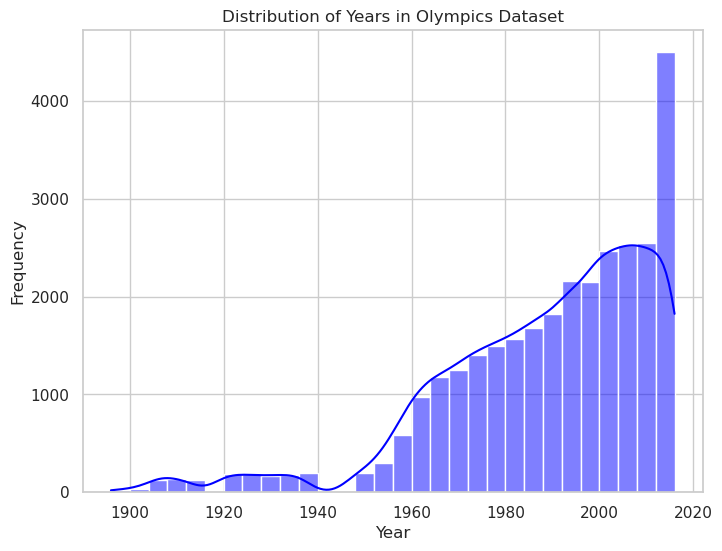

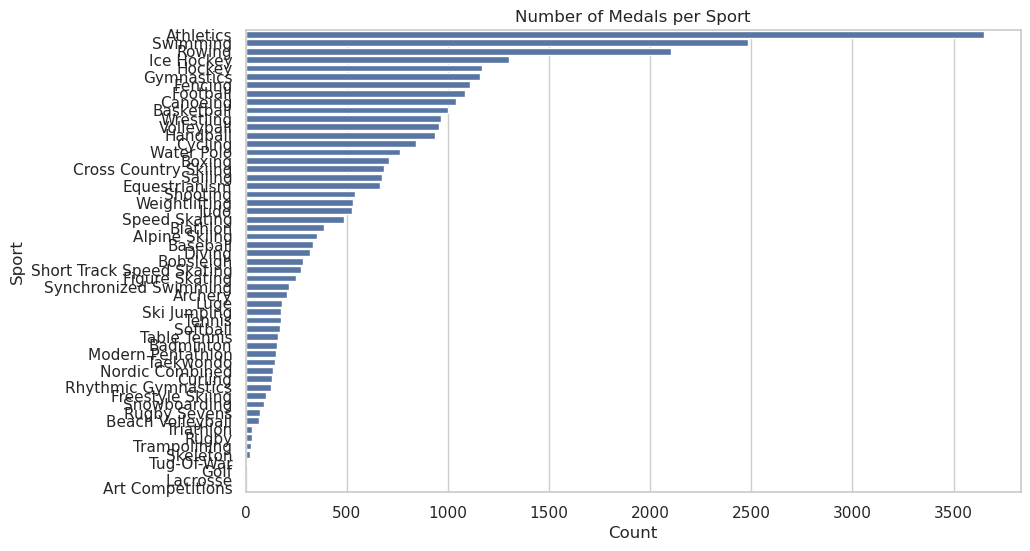

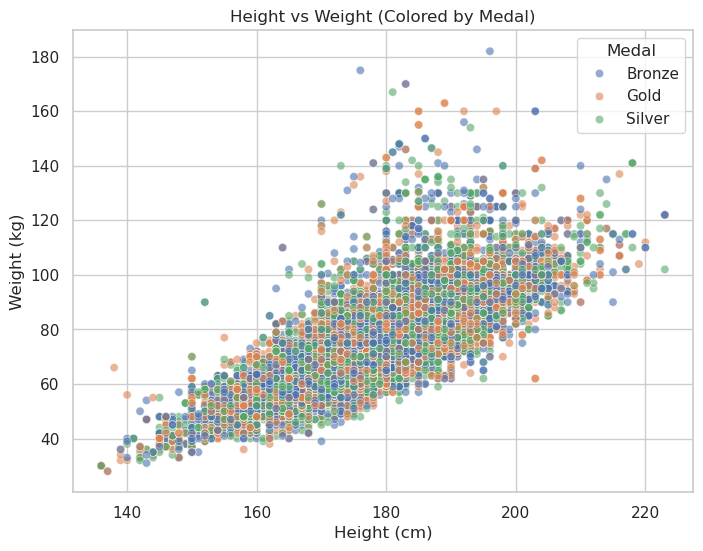

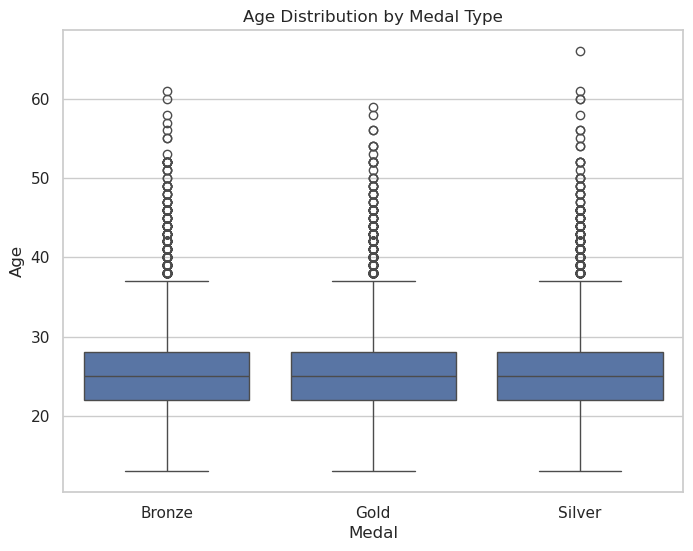

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file from the URL
olympics = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv')

# Remove missing values
olympics_cleaned = olympics.dropna()

# Set up the visual style for the plots
sns.set(style="whitegrid")

# 1. Histogram: Distribution of a numerical column (e.g., 'year')
plt.figure(figsize=(8, 6))
sns.histplot(olympics_cleaned['year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Years in Olympics Dataset')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# 2. Bar Plot: Frequency of medals by sport
plt.figure(figsize=(10, 6))
sns.countplot(y='sport', data=olympics_cleaned, order=olympics_cleaned['sport'].value_counts().index)
plt.title('Number of Medals per Sport')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.show()

# 3. Scatter Plot: Relationship between height and weight (if these columns exist)
if 'height' in olympics_cleaned.columns and 'weight' in olympics_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='height', y='weight', data=olympics_cleaned, hue='medal', alpha=0.6)
    plt.title('Height vs Weight (Colored by Medal)')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.legend(title='Medal')
    plt.show()

# 4. Box Plot: Distribution of athlete ages by medal type
if 'age' in olympics_cleaned.columns and 'medal' in olympics_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='medal', y='age', data=olympics_cleaned)
    plt.title('Age Distribution by Medal Type')
    plt.xlabel('Medal')
    plt.ylabel('Age')
    plt.show()


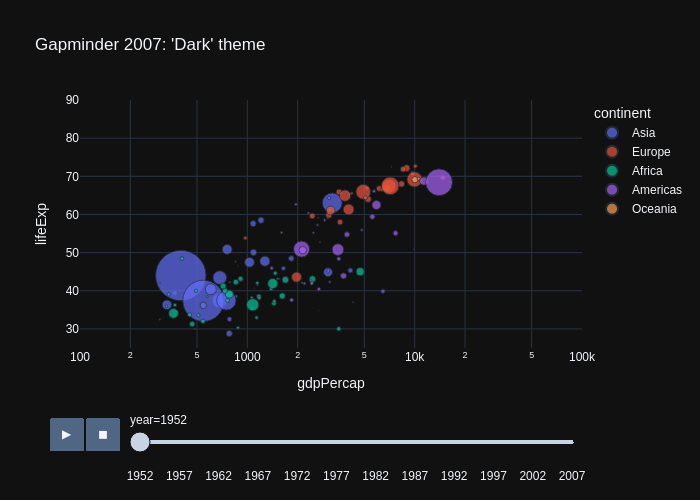

In [21]:
#7. 
import plotly.express as px

# Load the dataset
df = px.data.gapminder()

# Create the scatter plot with the correct parameter placement
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=55, 
                 range_x=[100,100000], 
                 range_y=[25,90],
                 template="plotly_dark",  # Add the template inside the function
                 title="Gapminder 2007: 'Dark' theme")  # Add title here

# Display the plot
fig.show(renderer="png")



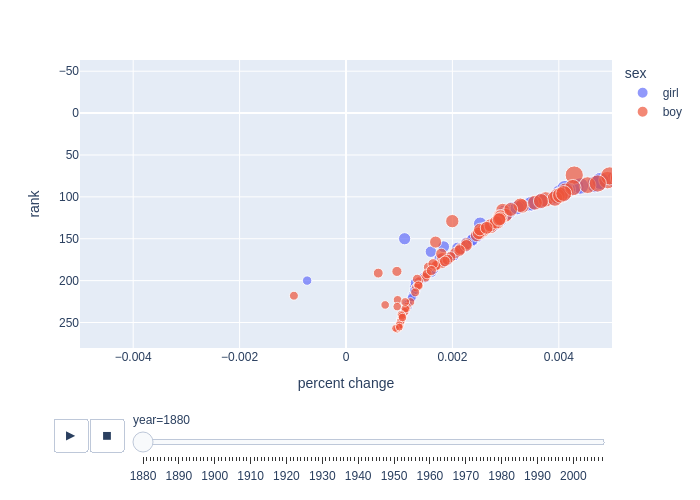

In [20]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

#9. A little bit
Link to conversation: https://chatgpt.com/share/66f4385f-6290-8010-ab09-19d5d2e24151
In this conversation, you asked for help with several Python coding issues, particularly related to data visualization using plotly.express. Here's a summary:

Negation of Logical Statements: You asked about negating specific logical and mathematical statements.

Data Loading Issues: You encountered a syntax error while loading a CSV file using R, which I assisted with. Later, you moved to Python and asked for help displaying and cleaning data (removing missing values) as well as visualizing it using graphs.

Visualization Issues: You encountered problems with graphs not displaying. I suggested adding %matplotlib inline in Jupyter Notebooks or using plt.show() depending on your environment.

Indentation Error: You asked about fixing an indentation error related to the template and title parameters in a plotly plot. I helped correct the code by positioning the parameters properly.

Custom Data Visualization: You were working on a scatter plot with Plotly using a custom dataset and faced errors due to incorrect parameter values (size="50"). I explained how to fix this by using a valid column for size or removing the size parameter altogether.

Let me know if you need further clarification on any of these topics!